In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv(r'C:\Users\Vinayak\OneDrive\Desktop\IBM_Attrition_data.csv')

In [3]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [4]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [7]:
#checking fro missing values
df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [8]:
#correlation matrix
df.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


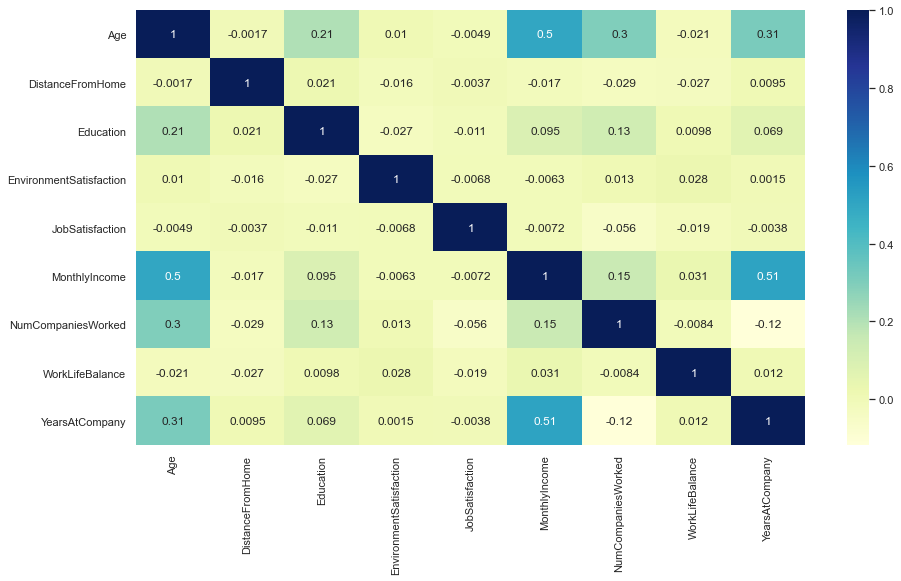

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.set(rc = {'figure.figsize':(15,8)})
data_map=sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

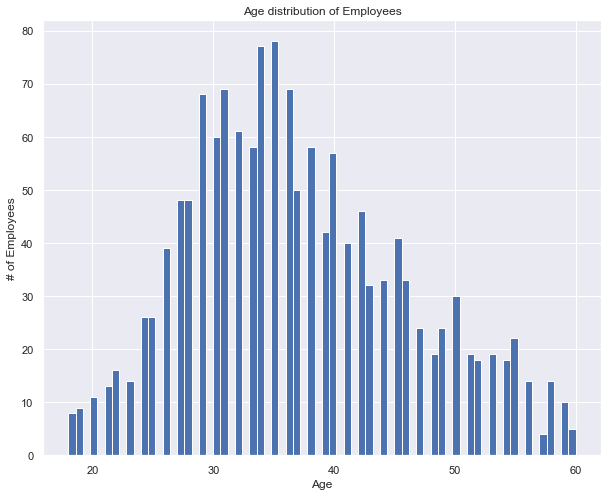

In [13]:
#age distribution
plt.figure(figsize=(10,8))
df['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

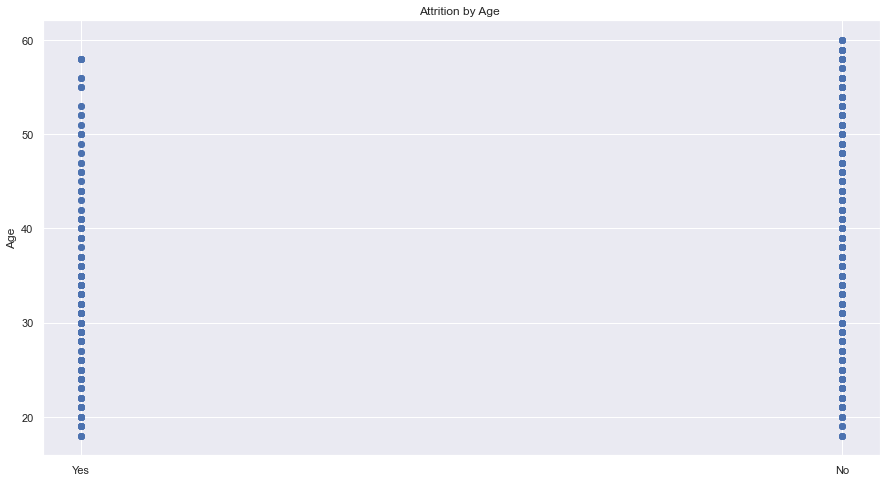

In [16]:
#explore attrition data 
plt.scatter(df.Attrition,df.Age)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

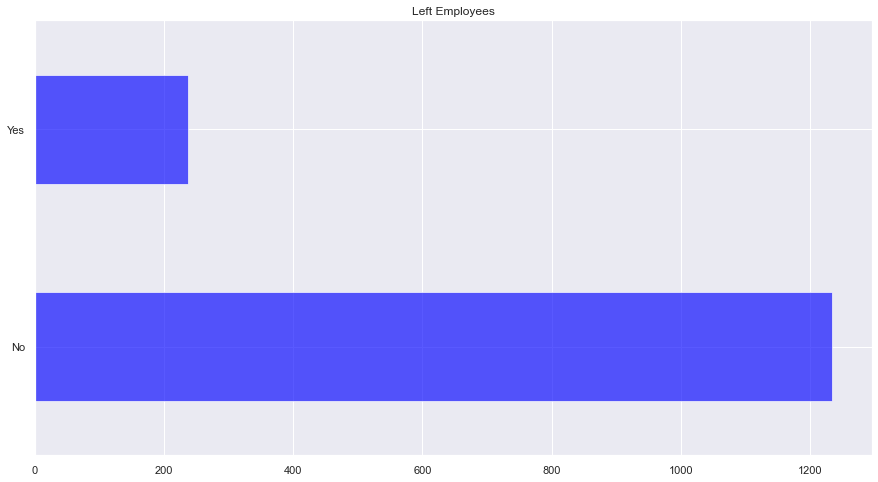

In [18]:
#data for left employees
df.Attrition.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title("Left Employees")
plt.show()

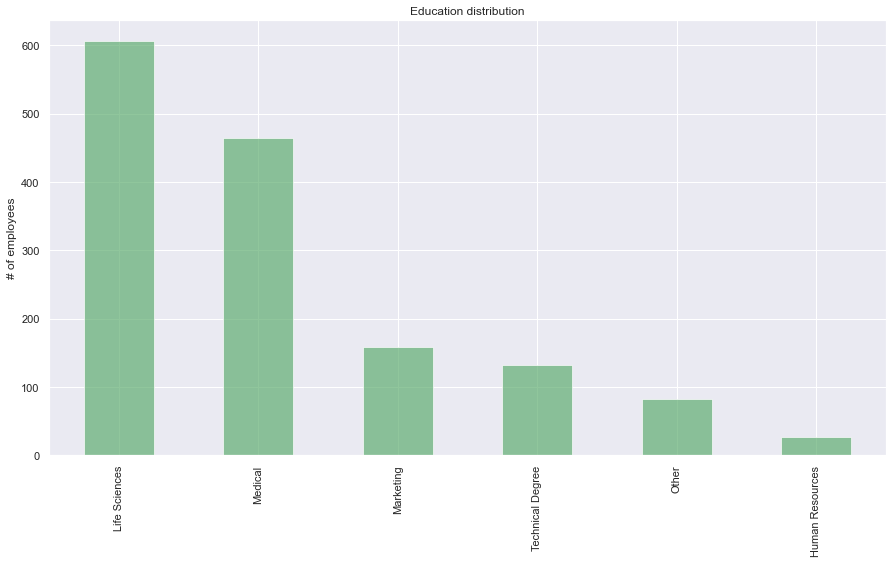

In [22]:
df.EducationField.value_counts().plot(kind='bar',color='g',alpha=.65)
plt.title("Education distribution")
plt.ylabel("# of employees")
plt.show()

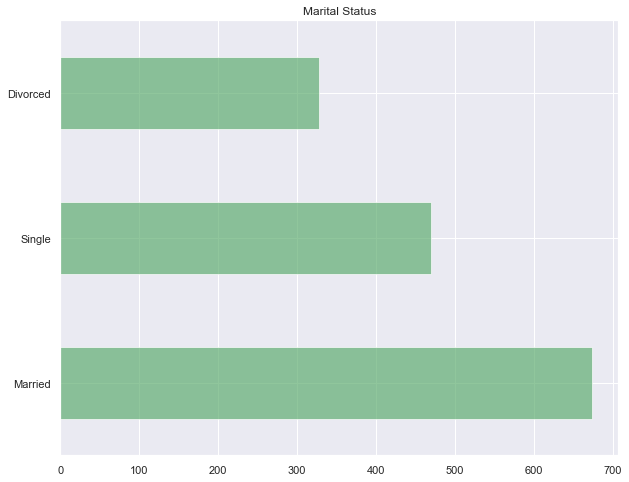

In [23]:
plt.figure(figsize=(10,8))
df.MaritalStatus.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Marital Status")
plt.show()

In [25]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Attrition.value_counts()
df['Attrition']=le.fit_transform(df.Attrition)
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,0,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,0,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,0,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [27]:
df.dtypes

Age                         int64
Attrition                   int32
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [32]:
#converting all object features to intnusing label Encoder
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [33]:
df.dtypes

Age                        int64
Attrition                  int32
Department                 int32
DistanceFromHome           int64
Education                  int64
EducationField             int32
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int32
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [34]:
df.MaritalStatus.value_counts()

1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

In [36]:
df.head(10)
df.shape

(1470, 13)

In [38]:
# splitting features and target
X=df.drop('Attrition',axis=1)
X.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,2,1,2,1,2,4,2,5993,8,1,6
1,49,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,2,2,4,4,3,2,2090,6,3,0
3,33,1,3,4,1,4,3,1,2909,1,3,8
4,27,1,2,1,3,1,2,1,3468,9,3,2


In [39]:
Y=df['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Vinayak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
model.score(X_train,Y_train)

0.8460884353741497

In [48]:
Y_pred=model.predict(X_test)

In [49]:
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [50]:
from sklearn import metrics

print (metrics.accuracy_score(Y_test, Y_pred))

0.8367346938775511


In [51]:
X_test

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
442,36,2,10,4,3,2,4,2,9980,1,2,10
1091,33,1,25,3,1,4,2,2,4320,1,3,5
981,35,2,18,4,2,4,3,1,4614,0,2,4
785,40,1,20,4,5,1,4,1,10322,4,3,11
1332,29,1,24,2,1,4,4,2,2439,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1439,36,2,3,3,3,1,4,1,7644,0,3,9
481,34,1,1,2,1,2,4,1,3622,1,3,6
124,31,2,6,4,1,2,3,1,6172,4,2,7
198,38,1,2,4,1,4,3,1,6553,9,3,1


In [52]:
probs = model.predict_proba(X_test)
print (probs)

[[0.87534191 0.12465809]
 [0.77591794 0.22408206]
 [0.86612123 0.13387877]
 [0.83451486 0.16548514]
 [0.80077989 0.19922011]
 [0.89813469 0.10186531]
 [0.64012057 0.35987943]
 [0.75369874 0.24630126]
 [0.97841119 0.02158881]
 [0.77410237 0.22589763]
 [0.9762861  0.0237139 ]
 [0.66721939 0.33278061]
 [0.96165244 0.03834756]
 [0.59504258 0.40495742]
 [0.88032411 0.11967589]
 [0.94576929 0.05423071]
 [0.90371376 0.09628624]
 [0.89489241 0.10510759]
 [0.88817591 0.11182409]
 [0.59895311 0.40104689]
 [0.64610262 0.35389738]
 [0.94649317 0.05350683]
 [0.87489288 0.12510712]
 [0.93146073 0.06853927]
 [0.6579327  0.3420673 ]
 [0.83787483 0.16212517]
 [0.79561124 0.20438876]
 [0.97435448 0.02564552]
 [0.60460543 0.39539457]
 [0.8938472  0.1061528 ]
 [0.9208564  0.0791436 ]
 [0.93020312 0.06979688]
 [0.81043591 0.18956409]
 [0.87585305 0.12414695]
 [0.94285023 0.05714977]
 [0.93092775 0.06907225]
 [0.94740087 0.05259913]
 [0.84012341 0.15987659]
 [0.93715857 0.06284143]
 [0.84971519 0.15028481]


In [53]:
print (metrics.roc_auc_score(Y_test, probs[:, 1]))

0.7253644314868803


In [54]:
#using random forrest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [55]:
forest.score(X_train,Y_train)

0.9761904761904762

In [56]:
y_pred=forest.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [57]:
print(metrics.accuracy_score(Y_test,y_pred))

0.8469387755102041
